In [1]:
%matplotlib inline
from datetime import datetime, date  # working with date and time
import matplotlib.pyplot as plt      # graphing
import numpy as np                   # math
import os                            # useful for handling filenames etc.
import pandas as pd                  # manipulating data
from scipy.stats import pearsonr     # calculates the Pearson correlation coefficient and p-value
import seaborn as sns                # makes matplotlib beautiful
sns.set_style('darkgrid')
import weather_station_utils as wsu  # helper functions for WeatherUnderground data

import matplotlib as mpl             # control formatting
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.titleweight'] = 'semibold'

# interactive graphs
from bokeh.io import output_notebook, show, push_notebook
from bokeh.plotting import figure
from bokeh.layouts import row, column
from bokeh.models import DatetimeTickFormatter
output_notebook()

Loading BokehJS ...

# Goleta Fire Pt.2
We did not see any results whatsoever of the Goleta fires at either Etcheverry Hall (Berkeley) or at Pinewood High School (Los Altos, south of San Francisco), presumably because hills isolated Berkeley and the rest of the westernmost parts of the Bay Area from the fires in Southern California. However, Miramonte HS (Orinda) and Campolindo HS (Moraga) are both on the opposite side of the hills, so there *might* be some effect of the fire in those areas. Let's see if we can see anything.

In [2]:
MORAGA_LOC_ID = 'KCAMORAG34'  # Moraga WeatherUnderground station
ORINDA_LOC_ID = 'KCAORIND23'  # Orinda Weatherunderground station

INTERVAL = 10800  # 3 hours
LOC_MORAGA = 'chs'  # Campolindo High School is in Moraga
LOC_ORINDA = 'mira'  # Miramonte High School is in Orinda

DATA_DIR = 'binned_data_10_days'

moraga_data = wsu.get_all_binned(interval=INTERVAL, data_dir=DATA_DIR, location=LOC_MORAGA)
orinda_data = wsu.get_all_binned(interval=INTERVAL, data_dir=DATA_DIR, location=LOC_ORINDA)

In [ ]:
moraga_data

In [4]:
orinda_data

,unix_time,co2,pgradiation,humidity,temperature,pressure,pm1,pm25,pm10
0,1530255601,0.0,1.911111,72.984444,15.888056,995.494444,6.627500,10.525556,14.983056
1,1530266401,0.0,2.055556,75.268919,15.345405,995.597297,7.122500,11.071389,15.822222
2,1530277201,0.0,1.700000,73.535135,16.661622,995.847568,5.984444,9.436111,13.463333
3,1530288001,0.0,1.733333,65.364324,21.233514,995.968378,6.456111,10.079167,14.388056
4,1530298801,0.0,2.027778,45.755135,25.516757,995.334054,2.593056,4.801111,6.931389
5,1530309601,0.0,2.969231,34.848611,27.657222,994.149444,1.068333,2.599167,3.822500
6,1530320401,0.0,NaN,37.908333,27.755833,993.008333,2.974722,5.411944,7.860556
7,1530331201,0.0,2.029412,53.354722,21.696389,993.742222,5.231389,8.671667,12.557778
8,1530342001,0.0,1.872222,62.940833,18.357222,993.679722,4.519444,7.565278,10.915833
9,1530352801,0.0,1.911111,68.175000,16.200000,993.881111,3.617222,5.979722,8.643056


## Combining Data from Both Locations
Campolindo seems to have a lot of incomplete data, unlike Miramonte. So we should only need to use data from the latter, right? Not quite. Look closely at the `co2` column in the `orinda_data` DataFrame. It is all zeros. So we have to get at least that data from Campolindo. So we will do two things:
1. Combine the $CO_2$ data from Campolindo with the rest of the data from Miramonte.
2. Just use the Campolindo data by itself to see if it deviates significantly from the composite data.

In [5]:
# just to know how many data points we will have to work with,
# let's see how many NaNs there are in the Campolindo data,
# and let's make sure that some values in the Miramonte `co2`
# column are not nonzero
print('Number of `NaN`s in `moraga_data`:\n', moraga_data['co2'].value_counts(dropna=False).iloc[0])
print('\nValue counts of `orinda_data`:\n', orinda_data['co2'].value_counts(dropna=False))

Number of `NaN`s in `moraga_data`:
 44

Value counts of `orinda_data`:
 0.0    101
Name: co2, dtype: int64


So less than half of all the values in the Moraga dataset are actually `NaN`s. This means we have $(101-44)=57$ data points in the Moraga dataset. And the second result shows that **_all_** the values in the `co2` Series in the `orinda_data` DataFrame are zero, so we cannot use that Series at all.

In [6]:
good_data = pd.concat([orinda_data.drop(['co2'], axis=1),
                       moraga_data['co2']],
                      axis=1)
good_data.dropna(how='any', axis=0, inplace=True)
good_data

,unix_time,pgradiation,humidity,temperature,pressure,pm1,pm25,pm10,co2
21,1530482401,1.982857,68.426857,19.852857,997.686000,1.842571,3.759429,5.328286,545.979130
22,1530493201,1.962162,69.224167,19.094444,997.418056,1.298889,2.796389,3.939444,535.310000
23,1530504001,1.816667,75.328611,17.256111,997.418889,0.596389,1.674444,2.581111,519.441667
24,1530514801,1.872222,78.278056,16.781111,996.766111,2.456389,4.570556,6.392778,531.253611
25,1530525601,1.872222,80.548889,16.038333,996.465833,3.040000,5.214444,7.325556,529.483333
26,1530536401,1.966667,77.472432,16.461622,997.076216,3.604324,5.655135,7.619189,529.158378
27,1530547201,1.733333,72.545556,18.173056,997.151111,3.595556,5.704167,7.631111,550.115833
28,1530558001,1.783333,68.128889,19.631389,997.023056,4.502778,7.081111,9.529722,555.925833
29,1530568801,1.844444,65.381111,20.201389,995.710278,4.446944,6.910556,9.342500,536.211111
30,1530579601,1.722222,68.250556,18.907778,994.435556,1.663889,3.426111,4.786389,519.572500


Since we have had to give up data points from the beginning and end of our data sets, let's verify the range of dates included in our data.

In [7]:
start = date.fromtimestamp(good_data.iloc[0]['unix_time'])
end = date.fromtimestamp(good_data.iloc[-1]['unix_time'])

print('Start date:', start)  # get the first number from the
print('End date:', end)   # printed DataFrame above

Start date: 2018-07-01
End date: 2018-07-08


Despite not having data from all the dates that we originally intended, we do have data from the beginning and the worst part of the fires. So we should see results from this data if we were to see any from the rest of the data.

Before getting data from the weather station, let's see if there is any correlation between particulate matter concentrations and $CO_2$ concentration, because the presence of a positive correlation will indicate the effect of the fires.

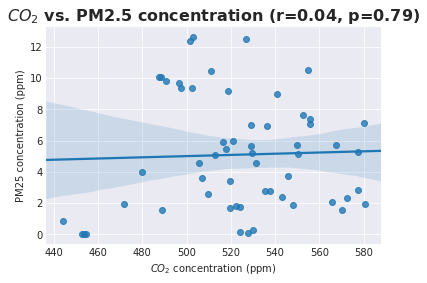

In [8]:
sns.regplot('co2', 'pm25', data=good_data)
plt.xlabel('$CO_2$ concentration (ppm)')
plt.ylabel('PM25 concentration (ppm)')
r, p = pearsonr(good_data['co2'], good_data['pm25'])
plt.title(f'$CO_2$ vs. PM2.5 concentration (r={r:.2f}, p={p:.2f})')
None

Whoa. There is *NO* correlation between $CO_2$ concentration at Campolindo and particulate matter concentrations at Miramonte. This indicates that either
* Moraga and Orinda were not affected by the fire similarly, or
* Moraga and Orinda were not affected by the fire at all.

## Getting WeatherUnderground Data
Now let's get data from WeatherUnderground and see if there is any correlations between wind direction and particulate matter or $CO_2$. We might see one of the two pairs being correlated if Moraga and Orinda were affected differently by the fires.

In [18]:
print(f'Getting data from {start} to {end}, from {MORAGA_LOC_ID}.')
moraga_ws = wsu.get_ws_data_by_time(start, end, MORAGA_LOC_ID)

# first, save the DataFrame as a `.csv` file
# before saving, we need to rename the column `Time` to `deviceTime_unix`
header = moraga_ws.columns.values.tolist()
header[6] = 'deviceTime_unix'
print(header)

# comment out this line because we don't want to save the `.csv` file every time we rerun the notebook
moraga_ws.to_csv('wunderground_data/data_fire_chs.csv', na_rep='nan', index=False, header=header)

moraga_ws

Getting data from 2018-07-01 to 2018-07-08, from KCAMORAG34.
['Dewpoint', 'HourlyPrecipIn', 'Humidity', 'Pressure', 'SolarRadiationWatts/m^2', 'Temperature', 'deviceTime_unix', 'WindDirection', 'WindDirectionDegrees', 'WindSpeedGustMPH', 'WindSpeedMPH', 'dailyrainin']


,Dewpoint,HourlyPrecipIn,Humidity,Pressure,SolarRadiationWatts/m^2,Temperature,Time,WindDirection,WindDirectionDegrees,WindSpeedGustMPH,WindSpeedMPH,dailyrainin
0,10.722222,0.0,62.0,1006.769377,0.0,18.111111,1530428693,South,180.0,1.1,0.7,0.0
1,10.888889,0.0,63.0,1006.769377,0.0,18.000000,1530428979,South,180.0,1.1,0.4,0.0
2,10.777778,0.0,63.0,1007.108014,0.0,17.888889,1530429289,South,180.0,1.1,0.2,0.0
3,10.888889,0.0,64.0,1007.108014,0.0,17.777778,1530429593,South,180.0,0.0,0.0,0.0
4,11.111111,0.0,65.0,1007.108014,0.0,17.722222,1530429893,South,180.0,1.1,1.1,0.0
5,11.222222,0.0,66.0,1006.769377,0.0,17.611111,1530430179,South,180.0,1.1,0.2,0.0
6,11.222222,0.0,66.0,1006.769377,0.0,17.611111,1530430489,South,180.0,1.1,0.9,0.0
7,11.388889,0.0,67.0,1006.769377,0.0,17.611111,1530430793,South,180.0,1.1,0.9,0.0
8,11.388889,0.0,67.0,1006.769377,0.0,17.611111,1530431093,South,180.0,1.1,0.2,0.0
9,11.500000,0.0,68.0,1007.108014,0.0,17.500000,1530431379,South,180.0,1.1,0.2,0.0


In [16]:
print(f'Getting data from {start} to {end}, from {ORINDA_LOC_ID}.')
orinda_ws = wsu.get_ws_data_by_time(start, end, ORINDA_LOC_ID)

# first, save the DataFrame as a `.csv` file
# before saving, we need to rename the column `Time` to `deviceTime_unix`
header = orinda_ws.columns.values.tolist()
header[5] = 'deviceTime_unix'
print(header)

# comment out this line because we don't want to save the `.csv` file every time we rerun the notebook
# orinda_ws.to_csv('wunderground_data/data_fire_mira.csv', na_rep='nan', index=False, header=header)

orinda_ws

Getting data from 2018-07-01 to 2018-07-08, from KCAORIND23.
['Dewpoint', 'HourlyPrecipIn', 'Humidity', 'Pressure', 'Temperature', 'deviceTime_unix', 'WindDirection', 'WindDirectionDegrees', 'WindSpeedGustMPH', 'WindSpeedMPH', 'dailyrainin']


,Dewpoint,HourlyPrecipIn,Humidity,Pressure,Temperature,Time,WindDirection,WindDirectionDegrees,WindSpeedGustMPH,WindSpeedMPH,dailyrainin
0,11.666667,0.0,83.0,1012.864852,14.666667,1530428822,WSW,245.0,1.0,0.0,0.0
1,12.222222,0.0,85.0,1012.864852,14.500000,1530429724,WSW,245.0,0.0,0.0,0.0
2,12.222222,0.0,86.0,1012.864852,14.277778,1530430626,WSW,245.0,0.0,0.0,0.0
3,12.222222,0.0,87.0,1012.864852,14.166667,1530431527,WSW,245.0,0.0,0.0,0.0
4,12.222222,0.0,87.0,1012.864852,14.111111,1530432428,WSW,245.0,1.0,0.0,0.0
5,12.222222,0.0,88.0,1012.864852,14.000000,1530433329,WSW,245.0,1.0,0.0,0.0
6,12.222222,0.0,89.0,1012.864852,13.888889,1530434230,WSW,249.0,0.0,0.0,0.0
7,12.222222,0.0,89.0,1012.526215,13.777778,1530435133,WSW,249.0,0.0,0.0,0.0
8,11.666667,0.0,89.0,1012.526215,13.611111,1530436035,WSW,248.0,1.0,0.0,0.0
9,12.222222,0.0,90.0,1012.526215,13.500000,1530436936,WSW,249.0,0.0,0.0,0.0


In [20]:
winddir_data_interval = pd.read_csv(f'binned_data_10_days/ws_chs_data_WindDirectionDegrees_{INTERVAL}.csv',
                                header=0, names=['unix_time', 'WindDirection'], usecols=[1])
windspd_data_interval = pd.read_csv(f'binned_data_10_days/ws_chs_data_WindSpeedGustMPH_{INTERVAL}.csv',
                                header=0, names=['unix_time', 'WindSpeedGustMPH'], usecols=[1])
temp_data_interval = pd.read_csv(f'binned_data_10_days/ws_chs_data_Temperature_{INTERVAL}.csv',
                                header=0, names=['unix_time', 'Temperature'], usecols=[1])
pressure_data_interval = pd.read_csv(f'binned_data_10_days/ws_chs_data_Pressure_{INTERVAL}.csv',
                                header=0, names=['unix_time', 'Pressure'], usecols=[1])
humidity_data_interval = pd.read_csv(f'binned_data_10_days/ws_chs_data_Humidity_{INTERVAL}.csv',
                                header=0, names=['unix_time', 'Humidity'], usecols=[1])
moraga_dosenet_and_ws = pd.concat([moraga_data, winddir_data_interval, windspd_data_interval,
                                   temp_data_interval, pressure_data_interval, humidity_data_interval],
                                  axis=1)
moraga_dosenet_and_ws.dropna(axis=0, how='any', inplace=True)  # there are some NaNs
moraga_dosenet_and_ws

,unix_time,co2,radiation,pgradiation,humidity,temperature,pressure,WindDirection,WindSpeedGustMPH,Temperature,Pressure,Humidity
21,1.530482e+09,545.979130,1227.121739,1.725000,60.487391,21.732609,993.027391,213.166667,3.163889,18.387346,1009.262125,73.583333
22,1.530493e+09,535.310000,1219.511111,1.811111,71.637500,18.208611,992.914722,216.277778,2.463889,15.305556,1008.942301,85.083333
23,1.530504e+09,519.441667,1226.455556,1.822222,82.555556,15.506389,993.012222,196.777778,2.119444,13.438272,1008.810608,93.277778
24,1.530515e+09,531.253611,1233.475676,1.972222,86.050000,15.102778,992.399167,184.027778,1.202778,13.328704,1008.208586,95.083333
25,1.530526e+09,529.483333,1231.254054,1.805556,86.677778,14.675278,992.145556,203.694444,0.961111,13.245370,1007.879355,94.888889
26,1.530536e+09,529.158378,1220.940541,1.844444,81.995135,15.376757,992.812973,178.416667,1.619444,13.898148,1008.424938,90.305556
27,1.530547e+09,550.115833,1209.083333,1.832432,67.947222,19.282222,992.770833,193.333333,2.952778,18.422840,1008.462564,73.305556
28,1.530558e+09,555.925833,1219.448649,1.902703,58.695833,21.875833,992.509167,231.416667,3.647222,20.356481,1008.293246,65.555556
29,1.530569e+09,536.211111,1228.955556,1.740541,59.525278,21.464444,991.152500,230.305556,3.133333,19.597222,1007.004542,67.583333
30,1.530580e+09,519.572500,1222.433333,1.638889,71.645000,17.783333,989.976389,208.305556,2.144444,16.285494,1005.715838,79.444444


In [29]:
winddir_data_interval = pd.read_csv(f'binned_data_10_days/ws_mira_data_WindDirectionDegrees_{INTERVAL}.csv',
                                header=0, names=['unix_time', 'WindDirection'], usecols=[1])
windspd_data_interval = pd.read_csv(f'binned_data_10_days/ws_mira_data_WindSpeedGustMPH_{INTERVAL}.csv',
                                header=0, names=['unix_time', 'WindSpeedGustMPH'], usecols=[1])
temp_data_interval = pd.read_csv(f'binned_data_10_days/ws_mira_data_Temperature_{INTERVAL}.csv',
                                header=0, names=['unix_time', 'Temperature'], usecols=[1])
pressure_data_interval = pd.read_csv(f'binned_data_10_days/ws_mira_data_Pressure_{INTERVAL}.csv',
                                header=0, names=['unix_time', 'Pressure'], usecols=[1])
humidity_data_interval = pd.read_csv(f'binned_data_10_days/ws_mira_data_Humidity_{INTERVAL}.csv',
                                header=0, names=['unix_time', 'Humidity'], usecols=[1])
orinda_dosenet_and_ws = pd.concat([orinda_data, winddir_data_interval, windspd_data_interval,
                                   temp_data_interval, pressure_data_interval, humidity_data_interval],
                                  axis=1)
orinda_dosenet_and_ws.dropna(axis=0, how='any', inplace=True)  # there are some NaNs
orinda_dosenet_and_ws

,unix_time,co2,pgradiation,humidity,temperature,pressure,pm1,pm25,pm10,WindDirection,WindSpeedGustMPH,Temperature,Pressure,Humidity
16,1.530428e+09,0.0,1.877778,59.031944,20.168611,995.142500,3.292500,5.631389,8.031944,246.916667,0.416667,13.944444,1012.723753,87.916667
17,1.530439e+09,0.0,1.938889,66.530278,18.967222,995.550278,4.058611,6.575833,9.204444,248.916667,0.166667,12.740741,1013.062391,92.083333
18,1.530450e+09,0.0,1.983333,68.019444,20.024722,996.865556,4.419167,7.218611,9.882500,222.000000,1.083333,14.402778,1014.332282,91.416667
19,1.530461e+09,0.0,1.977778,57.597222,23.603333,996.960278,4.697222,7.280556,9.547778,269.833333,2.166667,22.273148,1014.670919,65.083333
20,1.530472e+09,0.0,1.866667,58.605833,22.644444,997.405556,2.664444,4.659167,6.218056,207.833333,8.166667,21.000000,1014.953117,63.833333
21,1.530482e+09,0.0,1.982857,68.426857,19.852857,997.686000,1.842571,3.759429,5.328286,208.916667,10.500000,18.611111,1014.953117,72.416667
22,1.530493e+09,0.0,1.962162,69.224167,19.094444,997.418056,1.298889,2.796389,3.939444,202.750000,6.583333,16.467593,1014.783798,78.750000
23,1.530504e+09,0.0,1.816667,75.328611,17.256111,997.418889,0.596389,1.674444,2.581111,179.500000,5.000000,14.000000,1014.783798,88.916667
24,1.530515e+09,0.0,1.872222,78.278056,16.781111,996.766111,2.456389,4.570556,6.392778,177.416667,1.333333,13.425926,1014.332282,92.000000
25,1.530526e+09,0.0,1.872222,80.548889,16.038333,996.465833,3.040000,5.214444,7.325556,167.250000,0.583333,12.939815,1014.021864,92.250000


Now let's see the correlations between $CO_2$ concentration and wind direction in Moraga, with the size of the circles (importance) depending on wind speed.

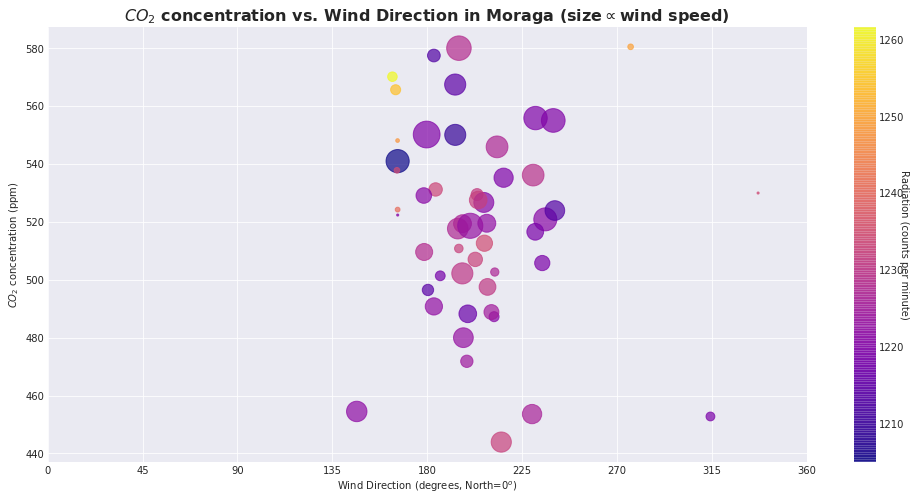

In [25]:
plt.figure(figsize=(17, 8))
plt.scatter(
    moraga_dosenet_and_ws['WindDirection'], moraga_dosenet_and_ws['co2'],
    c=moraga_dosenet_and_ws['radiation'], s=moraga_dosenet_and_ws['WindSpeedGustMPH']*150,
    cmap='plasma', alpha=0.7
)
cbar = plt.colorbar()
cbar.set_label('Radiation (counts per minute)', rotation=270)
plt.xlabel('Wind Direction (degrees, North=$0^o$)')
plt.ylabel('$CO_2$ concentration (ppm)')
plt.xlim(left=0, right=360)
plt.xticks([45 * i for i in range(9)])
plt.title('$CO_2$ concentration vs. Wind Direction in Moraga (size$\propto$wind speed)')
plt.show()

From this plot, it seems quite certain there is very weak correlation, if any. But let's do a regression plot to be sure.

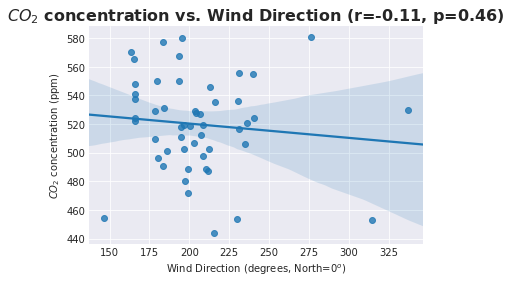

In [27]:
sns.regplot('WindDirection', 'co2', data=moraga_dosenet_and_ws)
plt.xlabel('Wind Direction (degrees, North=$0^o$)')
plt.ylabel('$CO_2$ concentration (ppm)')
r, p = pearsonr(moraga_dosenet_and_ws['co2'], moraga_dosenet_and_ws['WindDirection'])
plt.title(f'$CO_2$ concentration vs. Wind Direction (r={r:.2f}, p={p:.2f})')
None

Confirmed. There was no significant correlation between wind direction and $CO_2$ concentration in Moraga.

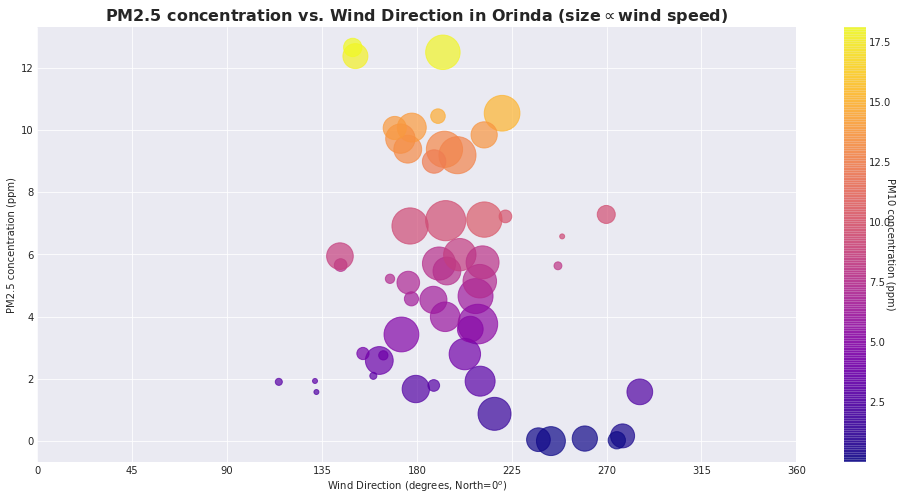

In [32]:
plt.figure(figsize=(17, 8))
plt.scatter(
    orinda_dosenet_and_ws['WindDirection'], orinda_dosenet_and_ws['pm25'],
    c=orinda_dosenet_and_ws['pm10'], s=orinda_dosenet_and_ws['WindSpeedGustMPH']*150,
    cmap='plasma', alpha=0.7
)
cbar = plt.colorbar()
cbar.set_label('PM10 concentration (ppm)', rotation=270)
plt.xlabel('Wind Direction (degrees, North=$0^o$)')
plt.ylabel('PM2.5 concentration (ppm)')
plt.xlim(left=0, right=360)
plt.xticks([45 * i for i in range(9)])
plt.title('PM2.5 concentration vs. Wind Direction in Orinda (size$\propto$wind speed)')
plt.show()

This also indicates a lack of correlation between wind direction and airborne particulate matter concentration in Orinda. However, we will look at regression plots to be sure.

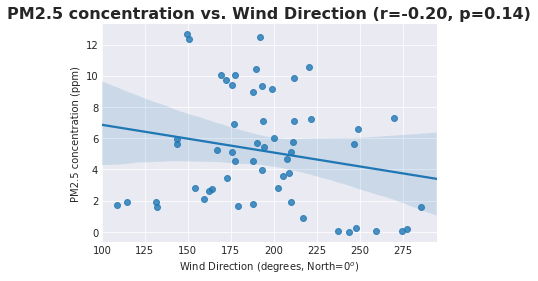

In [35]:
sns.regplot('WindDirection', 'pm25', data=orinda_dosenet_and_ws)
plt.xlabel('Wind Direction (degrees, North=$0^o$)')
plt.ylabel('PM2.5 concentration (ppm)')
r, p = pearsonr(orinda_dosenet_and_ws['pm25'], orinda_dosenet_and_ws['WindDirection'])
plt.title(f'PM2.5 concentration vs. Wind Direction (r={r:.2f}, p={p:.2f})')
None

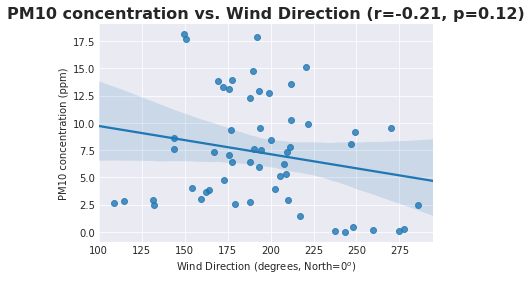

In [36]:
sns.regplot('WindDirection', 'pm10', data=orinda_dosenet_and_ws)
plt.xlabel('Wind Direction (degrees, North=$0^o$)')
plt.ylabel('PM10 concentration (ppm)')
r, p = pearsonr(orinda_dosenet_and_ws['pm10'], orinda_dosenet_and_ws['WindDirection'])
plt.title(f'PM10 concentration vs. Wind Direction (r={r:.2f}, p={p:.2f})')
None

There seems to be some correlation between wind direction and particulate matter concentration in Orinda. However, closer analysis of the plots indicates there are some points very close to zero, where the sensor readings are not very reliable, and removing those points will reduce the negative correlation. So overall there is not any significant correlation between wind direction and particulate matter concentration in Orinda.

Finally, in order to make sure that it even makes sense to combine the data from Moraga and Orinda, as we did in the beginning, let's see if both towns get wind blown in from similar directions.

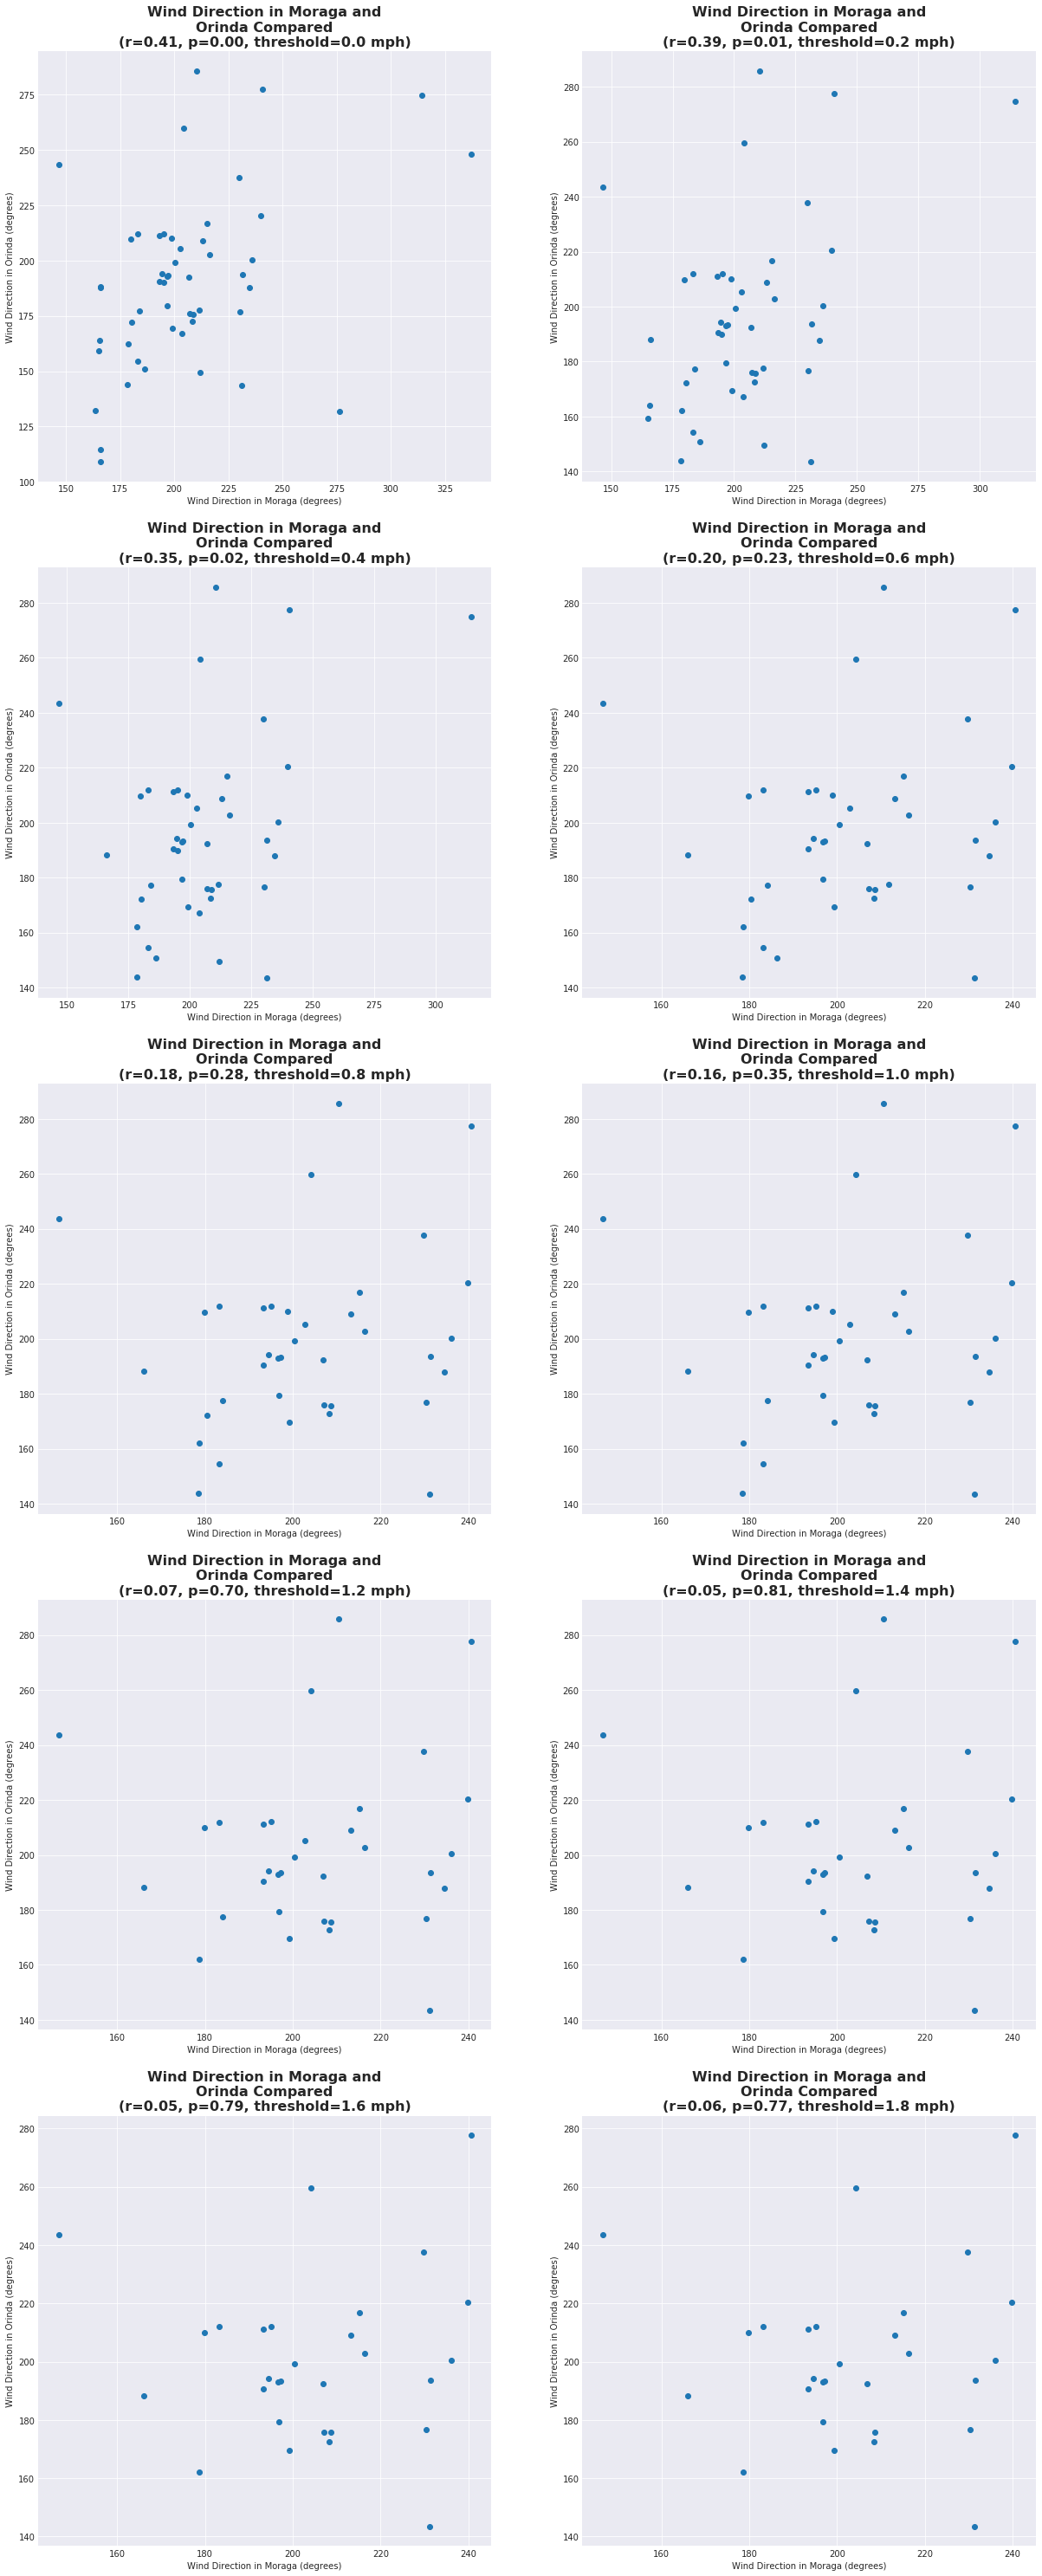

In [109]:
windy = pd.concat([moraga_dosenet_and_ws['WindDirection'], orinda_dosenet_and_ws['WindDirection'],
                   moraga_dosenet_and_ws['WindSpeedGustMPH'], orinda_dosenet_and_ws['WindSpeedGustMPH']],
                  axis=1)


def _filter_by_wind_speed(wind_df, threshold):
    result = wind_df.copy()
    for idx, dir_moraga, dir_orinda, sp_moraga, sp_orinda in wind_df.itertuples():
#         print(idx)
        if sp_moraga < threshold:
            result.iloc[idx-16, 0] = np.nan
        if sp_orinda < threshold:
            result.iloc[idx-16, 1] = np.nan
    return result


fig, axs = plt.subplots(5, 2, figsize=(8, 20), squeeze=False)
fig.subplots_adjust(right=1., left=-1., top=1., bottom=-1.)
for row in range(5):
    for col in range(2):
#         print(windy)
        thres = 0.2 * (2 * row + col)
        windy_ = _filter_by_wind_speed(windy, threshold=thres)
        windy_.dropna(axis=0, how='any', inplace=True)
        
        axs[row, col].scatter(windy_.iloc[:, 0], windy_.iloc[:, 1])
        axs[row, col].set_xlabel('Wind Direction in Moraga (degrees)')
        axs[row, col].set_ylabel('Wind Direction in Orinda (degrees)')
        r, p = pearsonr(windy_.iloc[:, 0], windy_.iloc[:, 1])
        axs[row, col].set_title(
            f'Wind Direction in Moraga and\nOrinda Compared\n(r={r:.2f}, p={p:.2f}, threshold={thres:.1f} mph)')
None

The wind directions are not well-correlated. They are not even equal most of the time (actually, any time). Considering that Moraga and Orinda are incredibly close (the weather stations are less than 4 miles apart, and Campolindo and Miramonte are less than 3 miles apart), this means that the two towns received wind from different sources. This means it does not really make sense to even combine data from the two towns. And the two-tailed p-value of $p\approx0.00$ means that we are incredibly sure about that. Furthermore, filtering out the slower wind speeds further *reduces* the correlation between the wind speeds.